# Advanced Clustering Notebook   

Today we will use this notebook to cover three clustering algorithms. This notebook is meant to accompany the DSGT lecture presentation. 

Together we will pull in a dataset and explore unsupervised learning via three different clustering algorithms: 
- k-Means
- Agglomerative Clustering  
- Density Based Clustering     

We implement all three using toolkits widespread throughout industry and academica and will perform a comparative analysis between each clustering algorithm. 
<img src="https://media.licdn.com/dms/image/C4E0BAQGZ-7dAEaqmCg/company-logo_200_200/0?e=2159024400&v=beta&t=-9_7r8w3C8umvoQ8-67w1FcfzHdGQympxHup_2CPof8" style="height:100px">  

 

In [1]:
# general imports. Default imports!
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing fancy functions is easy!
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Customer Clustering
<img src="./materials/debit-card.png" style="height:50px">  

## We will first look at kMeans and Agglomerative Clustering

We will use a shoppping example. We want to cluster users for a recommendaation system.   
We need to find groups that may behave similarly. Let's see what data we have  

In [2]:
data = pd.read_csv('./shopping_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


What are our labels (y)? What are our features (x)?

In [4]:
X = data.iloc[:, [2,3,4]].values #
y = data.iloc[:, [1]].values
print(data.shape)

(200, 5)


## KMeans  
KMeans is a common initial approach for clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
#standard flow -- create instance. fit model. use to predict.
kmeans= KMeans()
kmeans = KMeans(n_clusters=5) 
kmeans.fit_predict(X)
print('prediction and fitting done')

prediction and fitting done


Note: How did we come up with the number of clusters?
    
Answer: You wouldnt really know. Main ways to guess would be   
        1) subject matter expertise   
        2) knowing the number of classes upfront (we don't)  
        3) Using another algorithm to inform us (we use heirarchical clustering for this next!)
                                

Text(0,0.5,'Spending Score')

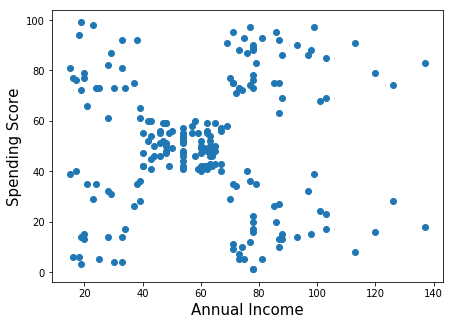

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:,1],X[:,2])
plt.xlabel('Annual Income', fontsize=15)
plt.ylabel('Spending Score', fontsize=15)

(Text(0.5,0,'Annual Income'), Text(0,0.5,'Spending Score'))

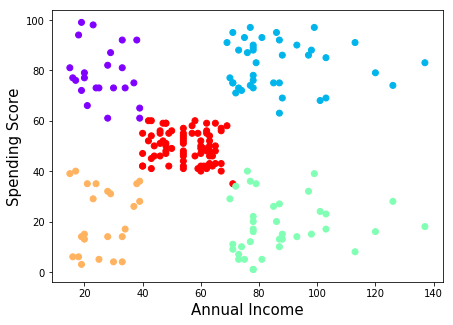

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,1],X[:,2], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Annual Income', fontsize=15), plt.ylabel('Spending Score', fontsize=15)

We can use the model to predict the identity of a novel input

In [9]:
y_pred = kmeans.predict(X)
print(y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Agglomerative Clustering  
We can derive clusters and insight into the data through dendrograms

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# instantiate and fit the model
clustering = AgglomerativeClustering(linkage='ward', n_clusters=5) 
clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

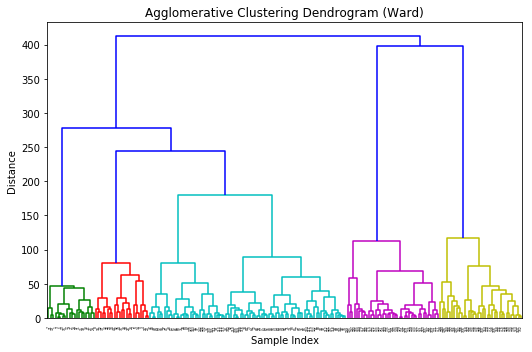

In [13]:
# Make the dendrogram. This is fancier but makes a nice image to understand
lnk_matrx = linkage(X, 'ward') # {“ward”, “complete”, “average”, “single”}#
figure = plt.figure(figsize=(7.5, 5))

dendrogram(lnk_matrx, color_threshold=220,
           truncate_mode= "lastp", p =len(X), leaf_font_size=3) #make the dendrogram and fix aesthetics

plt.title('Agglomerative Clustering Dendrogram (Ward)')
plt.xlabel('Sample Index'), plt.ylabel('Distance')
plt.tight_layout()
plt.show()

How did we choose where to designate clusters?

Rule of thumb: Find longest vertical line. Then split half-way down axis  

# Clustering Comparision and DBSCAN
### Iris Dataset
<img src="./materials/iris.png" style="height:50px">  

We will now take a look at DBSCAN.   
This approach is fundamentally different -- using the ideas of center, border, and noise points rather than neighbors  
We will see how it does on our favorite classic dataset: Iris!! 

Setup

In [14]:
data = datasets.load_iris() 
X = data.data
X = StandardScaler().fit_transform(X)
y = data.target

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Data Exploration  

Question: How can we visualize? We have 4 dimensions!!

Let's try kmeans and see how it seperates the data

In [15]:
kmeans= KMeans()
kmeans = KMeans(n_clusters=3) #3 for iris #5 for shopping
kmeans.fit_predict(X)
print('prediction and fitting done')

prediction and fitting done


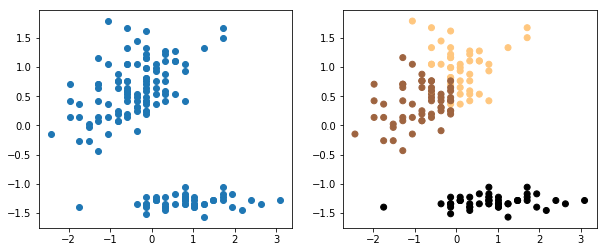

In [16]:
fig_k, axes_k = plt.subplots(1,2, figsize=(10,4))
axes_k[0].scatter(X[:,1], [X[:,2]])
axes_k[1].scatter(X[:,1], [X[:,2]], c=kmeans.labels_, cmap='copper')

Let's try DBSCAN. We will use Euclidean Distance

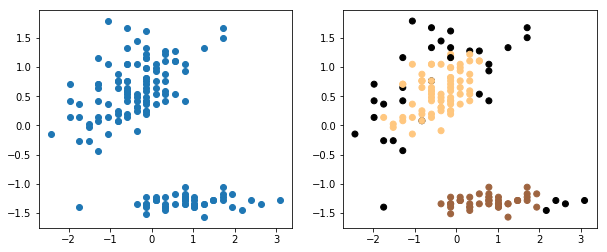

In [17]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
db.fit(X)

fig_d, axes_d = plt.subplots(1,2, figsize=(10,4))
axes_d[0].scatter(X[:,1], [X[:,2]])
axes_d[1].scatter(X[:,1], [X[:,2]], c=db.labels_, cmap='copper')

Now let's try Agglomerative Clustering

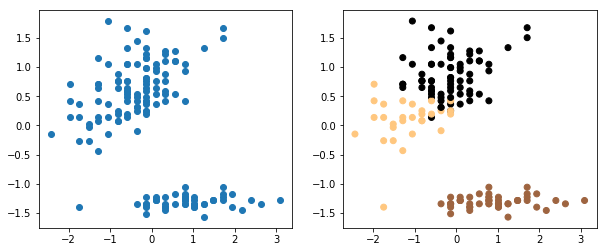

In [18]:
k=3
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster.fit(X, y)

fig_a, axes_a = plt.subplots(1,2, figsize=(10,4))
axes_a[0].scatter(X[:,1], [X[:,2]])
axes_a[1].scatter(X[:,1], [X[:,2]], c=cluster.labels_, cmap='copper')

#### This looks very different. Are all of the features behaving similarly? 

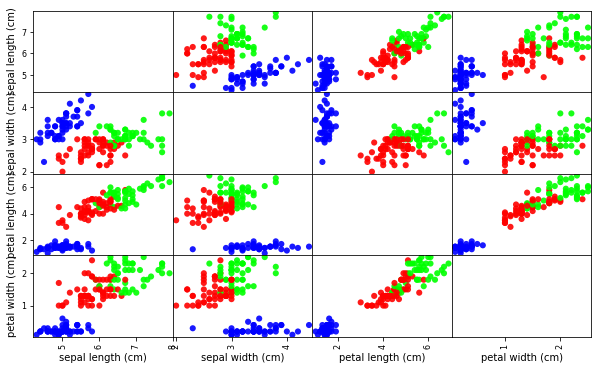

In [19]:
#KMeans
from pandas.plotting import scatter_matrix
df = pd.DataFrame(data.data, columns=data.feature_names)
plt.rcParams['axes.labelsize'] = 10

a = scatter_matrix(df, alpha = 0.9, figsize = (10, 6), diagonal = 'blank', 
                   c=kmeans.labels_, cmap='brg', s=150)

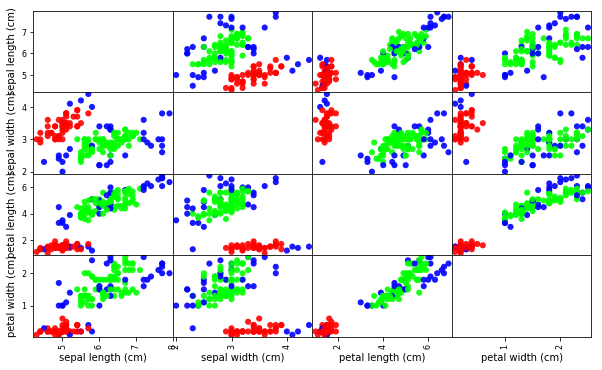

In [20]:
# DBSCAN
df = pd.DataFrame(data.data, columns=data.feature_names)
plt.rcParams['axes.labelsize'] = 10
a = scatter_matrix(df, alpha = 0.9, figsize = (10, 6), diagonal = 'blank', 
                   c=db.labels_, cmap='brg', s=150)

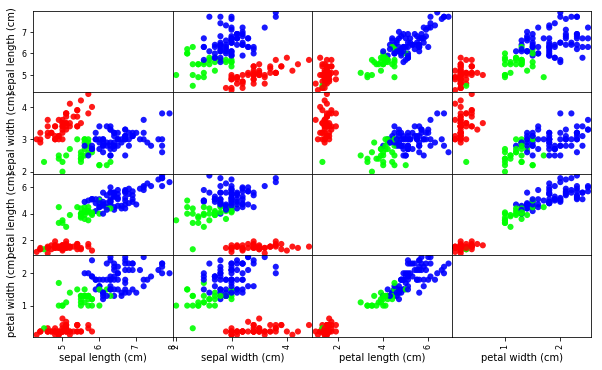

In [21]:
# Agglomerative
df = pd.DataFrame(data.data, columns=data.feature_names)
plt.rcParams['axes.labelsize'] = 10
a = scatter_matrix(df, alpha = 0.9, figsize = (10,6), diagonal = 'blank', 
                   c=cluster.labels_, cmap='brg', s=150)

## These are all clearly different. So how could we decide which is best?

- Measuring "accuracy" on clustering tasks is not straighforward. Remember that clustering has a different goal than classification -- and that often you may not have a labeled training set
- You cannot simply take a percentage, but numerous approaches to evaluating clustering performance exist


We will use sillhouette score and ARI  
ARI: Only works for labeled data  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html  
Sillhouette score: Does not need labels https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html  

In [22]:
# evaluate k means
kmeans_sil_score = silhouette_score(X, kmeans.labels_, metric='euclidean')

y_pred = kmeans.predict(X)
kmeans_ari = adjusted_rand_score(y, y_pred)

In [23]:
# evaluate dbscan 
db_sil_score = silhouette_score(X, db.labels_, metric='euclidean',
                                 sample_size=len(X))
y_pred_db = db.fit_predict(X)
db_ari =adjusted_rand_score(y, y_pred_db)

In [24]:
#Evaluate performance for Agglomerative
#Using three different linkage schemes -- how to determine distance between clusters

linkages = ['ward', 'average', 'complete']
ari_scores = []
sil_scores = []
for link in linkages:
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=link)
    cluster.fit(X)
    score = silhouette_score(X, cluster.labels_, metric='euclidean',
                                 sample_size=len(X))
    y_pred_agg = cluster.fit_predict(X)
    ari_scores.append(adjusted_rand_score(y, y_pred_agg))
    sil_scores.append(score)

# Comparing Clustering Algorithms  
Which would you say performs best?


In [25]:
def highlight_max(data, color='orange'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [26]:
df = pd.DataFrame({'Algorithm':['kMeans', 'DBSCAN', 'Agglomerative (ward)', 'Agglomerative (average)', 'Agglomerative (complete)'], 
                  'ARI Score':[kmeans_ari, db_ari, ari_scores[0], ari_scores[1], ari_scores[2]],
                  'Sillhouete Score':[kmeans_sil_score, db_sil_score, sil_scores[0], sil_scores[1], sil_scores[2]]})
df.set_index('Algorithm', inplace=True)

df.style.apply(highlight_max)

,ARI Score,Sillhouete Score
Algorithm,,
kMeans,0.592333,0.463042
DBSCAN,0.442099,0.356516
Agglomerative (ward),0.615323,0.446689
Agglomerative (average),0.562136,0.480267
Agglomerative (complete),0.572631,0.449618
